In [5]:

from models.UNET_big import UNet_Big
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

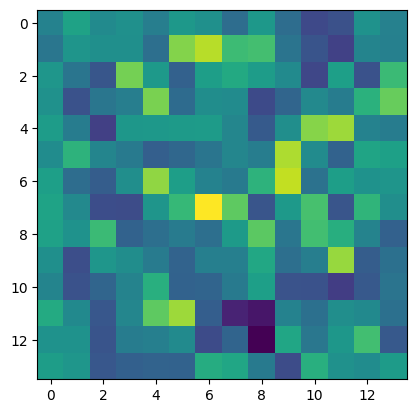

In [4]:
# testing the function outputs for different stages and input sizes:
img_size = 14
model = UNet_Big(stages=2, ctx_sz=0)
input_tensor = torch.randn(1, 1, img_size, img_size)
prev_noise = torch.randn(1, 1, img_size//2, img_size//2)
prev_noise_upsampled = F.interpolate(prev_noise, size=img_size, mode='bilinear', align_corners=True)
output_tensor = model.forward(torch.cat((input_tensor, prev_noise_upsampled), dim=1))


import matplotlib.pyplot as plt
import numpy as np


plt.imshow(prev_noise_upsampled.detach().numpy()[0, 0, :, :])
plt.imshow(input_tensor.detach().numpy()[0, 0, :, :])
plt.imshow(output_tensor.detach().numpy()[0, 0, :, :])


In [3]:
1/0

ZeroDivisionError: division by zero

In [ ]:
# # small training loop to maximize sum of output tensor

# iterations = 100
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # make a loss that rewards the left half of the image being white and the right half being black
# def loss_function(input):
#     return torch.sum(input[:, :, ::2, ::2]) - torch.sum(input[:, :, 1::2, 1::2])

# for i in range(iterations):
#     optimizer.zero_grad()
#     # random input image:
#     input_tensor = torch.randn(1, 1, img_size, img_size)
#     output_tensor = model.forward(input_tensor)
#     loss = loss_function(output_tensor)
#     loss.backward()
#     optimizer.step()
#     print("loss: {}".format(loss))

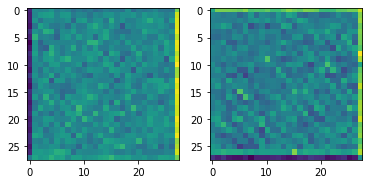

In [ ]:
# show two output tensors side by side, trained and untrained

fig, (ax1, ax2) = plt.subplots(1, 2)

input_tensor = torch.randn(1, 1, img_size, img_size)
output_tensor = model.forward(input_tensor)
ax1.imshow(output_tensor.detach().numpy()[0, 0, :, :])

model_raw = UNet(img_size, 1)
input_tensor = torch.randn(1, 1, img_size, img_size)
output_tensor = model_raw.forward(input_tensor)
ax2.imshow(output_tensor.detach().numpy()[0, 0, :, :])

In [ ]:
import torchvision

transform = torchvision.transforms.Compose([
    # convert 'Image' to tensor
    torchvision.transforms.ToTensor()
])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)


train_loader = data.DataLoader(mnist_trainset, batch_size=32, shuffle=True)

0it [00:00, ?it/s]

loss: 0.007888920605182648


100it [00:12,  8.08it/s]

loss: 0.002514326712116599


200it [00:25,  7.86it/s]

loss: 0.0024970329832285643


300it [00:37,  8.59it/s]

loss: 0.0024794768542051315


400it [00:50,  8.26it/s]

loss: 0.0024825811851769686


500it [01:02,  8.49it/s]

loss: 0.0024623640347272158


600it [01:14,  8.91it/s]

loss: 0.0025255458895117044


700it [01:27,  8.69it/s]

loss: 0.0025103644002228975


799it [01:38, 10.64it/s]

loss: 0.002503043506294489


900it [01:49,  9.59it/s]

loss: 0.0025052418932318687


1000it [02:00,  9.66it/s]

loss: 0.002467579673975706


1100it [02:13, 10.97it/s]

loss: 0.00251014600507915


1199it [02:22, 12.09it/s]

loss: 0.0025271375197917223


1300it [02:31, 12.59it/s]

loss: 0.0024916138499975204


1400it [02:39, 12.25it/s]

loss: 0.0024773229379206896


1500it [02:48, 11.71it/s]

loss: 0.0024982562754303217


1599it [02:56, 12.53it/s]

loss: 0.0025300588458776474


1699it [03:06, 12.13it/s]

loss: 0.0024787806905806065


1799it [03:14, 10.48it/s]

loss: 0.0024907661136239767


1875it [03:22,  9.28it/s]


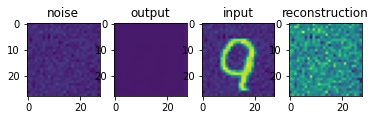

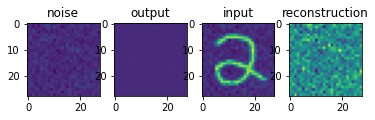

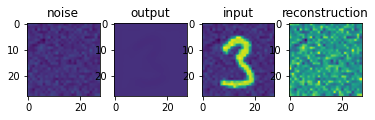

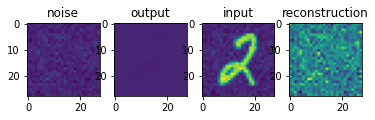

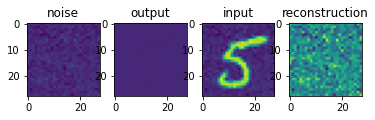

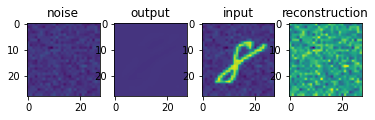

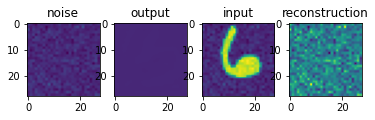

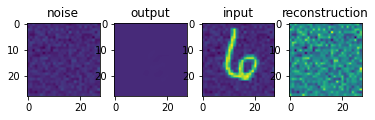

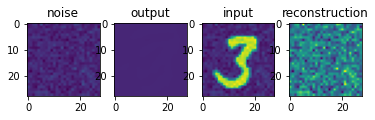

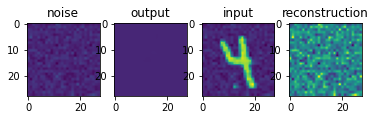

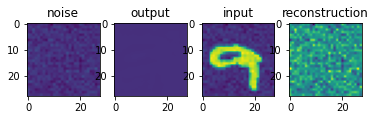

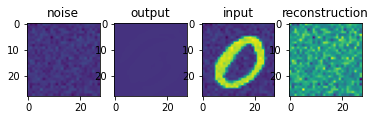

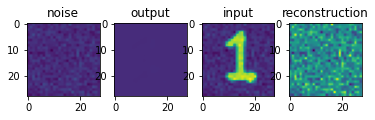

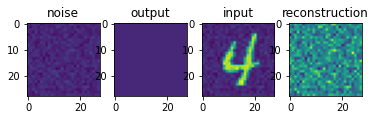

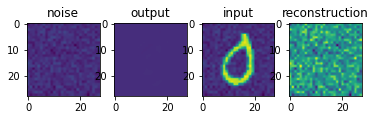

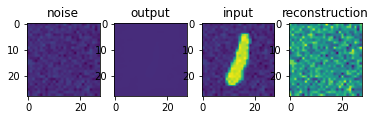

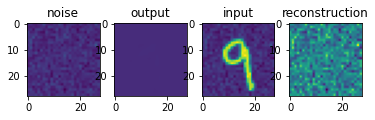

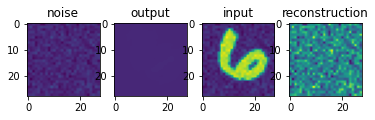

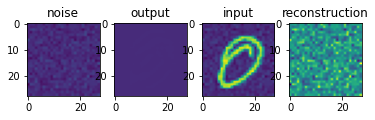

In [ ]:
import tqdm

# train loop: take a random mnist image, downsample, train the model to upsample again


epochs = 1
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(epochs):
    for i, batch in tqdm.tqdm(enumerate(train_loader)):
        optimizer.zero_grad()

        img, label = batch

        # get a random image from the mnist dataset
        img = img / 255.0 # normalize to 0-1

        # print ("img shape: {}".format(img.shape))

        # add noise to the image
        noise = torch.randn(img.shape[0], 1, img.shape[2], img.shape[3]) * 0.05
        noisy_img = img + noise

        # train the model to predict the noise
        output = model(img)
        loss = (noisy_img - output - img).pow(2).mean()
        
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print("loss: {}".format(loss))
            with torch.no_grad():
                # sample an image from the model
                # get a random image from the mnist dataset
                img, label = train_loader.__iter__().__next__()
                img = img[0:1, :, :, :]
                noise = torch.randn(1, 1, img.shape[2], img.shape[3]) * 0.05
                img = img + noise

                # train the model to predict the noise
                output = model(img)

                fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4)

                vmin = min(torch.min(noise), torch.min(output), torch.min(img), torch.min(img-output))
                vmax = max(torch.max(noise), torch.max(output), torch.max(img), torch.max(img-output))

                ax0.set_title("noise")
                ax0.imshow((noise).detach().numpy()[0, 0, :, :], vmin = vmin, vmax = vmax)
                ax1.set_title("output")
                ax1.imshow(output.detach().numpy()[0, 0, :, :], vmin = vmin, vmax = vmax)
                ax2.set_title("input")
                ax2.imshow(img.detach().numpy()[0, 0, :, :])
                ax3.set_title("reconstruction")
                ax3.imshow((noise-output).detach().numpy()[0, 0, :, :], )

                plt.savefig("train_results/{}.png".format(i))
        
        # print("loss: {}".format(loss))